수식을 최대한 줄이고 대신 프로그래밍으로 회귀분석을 최대한 이해/구현해본다

OLS : data를 fitting할 때 오류를 최소화 하는 방법

Matrix Inverse Method : 역행렬을 이용한 방법

β or w를 조절해가며 오류를 최소화 해야 한다.
    
    w^=argminw(y−wx)2 함수가 최소가 되게하는 w^를 찾아보자

변인의 개수가 지나치게 많으면 'overfitting'의 문제가 발생하여 bias의 감소의 장점보다 variance의 증가로 인한 단점이 증가한다. 
    
    극단적으로 변수(변인)의 개수가 데이터 수보다 많아지면 variance가 무한대로 증가

이를 방지하기 위해 'shrinkage' 방식으로 variance를 줄인다. (뷔페 생각하면 됨) 

# General linear Model

GLM은 정규분포를 따르는 선형 모델로 '일반화선형모델'로 부른다.

*generalized linear model은 정규 분포를 따르지 않는, 완전히 다른 용어이다.

# OLS

ordinary least squares 

    실제값에 예측값을 감하여 제곱한 값으로 최소화된 값으로 최적식을 구할 수 있다.
    제곱을 하는 이유는 음수가 나올 수 있기 때문이다.
    OLS를 최소화 하여 회귀식을 푼다

In [1]:
import numpy as np #공학계산이 가능하므로 리스트 대신 numpy를 사용한다
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

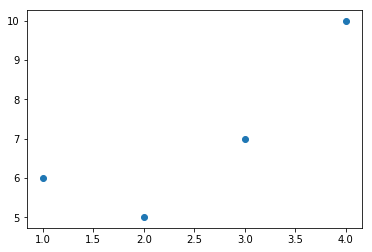

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111) 
#subplot()에는 3개의 인자가 사용된다 - 행, 열, 순서 (왼쪽 상단 1부터 시작해서 오른쪽으로 이동). 
#즉 211은 2행 1열의 첫째, 212는 2행 1열의 둘째를 의미한다.
ax.scatter(x,y) #위의 x, y를 좌표로 하여 나타내었다.

위의 좌표를 대표하는 그래프를 그리는데, 비선형으로 그린다면 이을 수 있겠지만, 
사실은 선형으로 모두 해결이 가능하다!

우리는 그래프를 선형으로 그려 점들간의 거리, 즉, 오차를 최소화해야한다.

오차를 구하기 위한 선형 회귀식을 만들어보자.

y=yhat

6=β0+β1×1 

5=β0+β1×2

7=β0+β1×3

10=β0+β1×4

오류 (y−yhat)2를 최소화하는 베타 값을 구해보자

6−(β0+β1×1))^2 

(5−(β0+β1×2))^2

(7−(β0+β1×3))^2

(10−(β0+β1×4))^2

위 식을 모두 더해서 총오류를 구하면:

f=210+4β^20+30β^21+20β0β1−56β0−154β1

위를 편미분하면:

∂f/∂β0=8β0+20β1−56

∂f/∂β1=20β0+60β1−154

이 식으로 연립방정식을 풀면 

β0=3.5 

β1=1.4

따라서 

yhat = 3.5+1.4x


편미분 하는 이유 f식은 이차함수, 이차함수의 최솟값을 구하기 위해 편미분을 하여 직선을 만드는데, 이 접점이 이차함수의 최솟값, 즉, 총오류의 최소가 된다.

yhat=x*1.4+3.5
print(yhat) #y값이 약간의 오차는 있지만 근사한다.

In [8]:
yhat-y #실제 편차 = 오류

array([-1.1,  1.3,  0.7, -0.9])

In [9]:
np.sum(np.power(yhat-y,2)) #오류의 제곱의 합 = 오류의 크기

4.199999999999998

Python으로 위의 계산과정을 구현해보자

In [10]:
import sympy as sp
b0,b1=sp.symbols('b0 b1') #b0, b1을 변수로 선언

In [12]:
f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1 #f=210+4β^20+30β^21+20β0β1−56β0−154β1
fdiff_b0=sp.diff(f,b0) #diff(f,b0)는 f함수를 b0에 대해서 미분하는 명령어
fdiff_b1=sp.diff(f,b1)
print("fdiff with b0: ",fdiff_b0,"fdiff with b1: ",fdiff_b1)

('fdiff with b0: ', 8*b0 + 20*b1 - 56, 'fdiff with b1: ', 20*b0 + 60*b1 - 154)


In [13]:
exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1]) #solve()로 풀면 해를 구할 수 있다
print("exp={0}".format(exp))

exp={b0: 7/2, b1: 7/5}


# R2

종속변수 dependent variable의 분산을 독립변수 independent variable(s)로 얼마나 예측할 수 있는지를 나타낸다.

    종속변수 : y, 독립변수 : x   -> y의 산포도를 나타낸다.
    
    TSS (Total Sum of Squared Errors ) = SSE (Sum of squared errors) + SSR (Residual Sum of squared errors)
    Residual : 잔여의
    r2=SSR/TSS 이 값이 높을수록 좋다.(종속변수에 대한 제어력이 있다.)

In [14]:
import numpy as np
x=np.arange(0,9) #0..8
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]) #y=ax1+bx2

In [15]:
A=np.array([x,np.ones(9)]) #np.ones -> 1을 넣어 절편을 구해보자
print A

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


numpy listsq를 사용하여 데이터의 회귀식 계수 w0, w1을 계산한다

In [16]:
w0,w1=np.linalg.lstsq(A.T,y)[0]
print w0,w1

0.7166666666666671 19.188888888888894


C:\Users\G312\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [17]:
yhat=w0*x+w1
print yhat

[19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


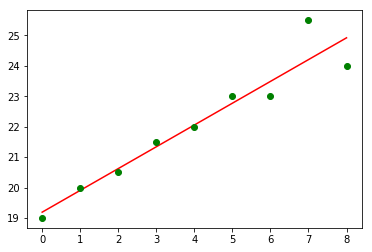

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'go') #빨간 실선 (r-), 파란 점 (bo)
plt.show()

위의 그래프는 회귀 선형식(선)과 실제 값(점)이 같이 그려져 있는 그래프이다.

In [25]:
SSR=sum((y-yhat)**2)
TSS=sum((y-np.mean(y))**2)
r_squared=1-(float(SSR))/TSS
print r_squared #약 0.91의 값이므로 매우 훌륭하다.

0.9138385502471169


overfitting을 막기 위해 adjusted R-squared를 사용한다.

R2 adjusted=1−((1−R2)(n−1)/n−k−1)

    n : 데이터 개수, k : 독립변수 개수

In [26]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-A.shape[0]-1)   # 0.9015 without -1
print adjusted_r_squared

0.8851180669961559


In [31]:
import statsmodels.api as sm

result = sm.OLS(y,A.T).fit()
print result.summary()
print result.rsquared, result.rsquared_adj

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     74.24
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           5.66e-05
Time:                        17:29:34   Log-Likelihood:                -7.6827
No. Observations:                   9   AIC:                             19.37
Df Residuals:                       7   BIC:                             19.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7167      0.083      8.616      0.0

# Matrix Inverse Method

w^  최소해를 구해보자. 

    오류 e는 잔차를 제곱해서 더한 합계 'sum of squared residuals' 이다. 
    따라서, f=e.T×e=(y−wx)^T(y−wx)=y^Ty−2w(x^Ty)^T+w^Tx^Twx
    T는 transpose, 전치행렬이다.
    
    위를 미분하면 ∂f∂w=0−2(x^Ty)+2wxTx
    
    위 미분 값을 0으로 놓고 풀면, −2x^Ty+2w^x^Tx=0
    
    위 식을 정리하면 w^=(XTX)−1X^Ty

In [33]:
import numpy as np
# 2*x1−4*x2=8 / 3*x1+6*x2=9
y=[8,9]
x=[[2,-4],[3,6]] #column이 두개 -> 속성이 2개이다

In [34]:
print "x: ", x, "y: ", y

x:  [[2, -4], [3, 6]] y:  [8, 9]


In [35]:
np.set_printoptions(precision=2, suppress=True) #출력 자릿수를 2자리로 제한

xT = np.linalg.inv(x) #xT : 행렬 x의 역행렬
print "x inv: \n", xT 

x inv: 
[[ 0.25  0.17]
 [-0.12  0.08]]


In [37]:
print "identity matrix 'x * xT': \n", np.dot(x,xT)
#x*xT(행렬*역행렬) = 단위행렬(identity matrix)

identity matrix 'x * xT': 
[[1. 0.]
 [0. 1.]]


In [38]:
print np.eye(2) #단위행렬 함수

[[1. 0.]
 [0. 1.]]


In [39]:
print np.eye(2) == np.dot(x,xT)

[[ True  True]
 [ True  True]]


# β

위 식을 행렬로 나타내면, β×x=y
양변에 x^−1를 곱하면 아래 식이 된다.

x^−1×x×β=x^−1×y

inverse에 원래의 벡터를 곱하면 identity matrix가 된다.

즉 x^−1×x=1이므로

아래와 같이 β를 구할 수 있다.

β=x^−1×y

Inverse 계산
    
    xx−1=I 인 x−1가 존재하면 x는 invertible이라고 한다.

np.array()는 np.linalg.inv(), np.mat()는 x.I로 inverse를 계산한다.

In [40]:
v=np.array([[2,3],[4,5]])
vI=np.linalg.inv(v)
print "v={0}\nv.I={1}".format(v,vI) #([[-2.5, 1.5], [ 2. , -1. ]])

v=[[2 3]
 [4 5]]
v.I=[[-2.5  1.5]
 [ 2.  -1. ]]


In [41]:
left=1./(2*5-3*4)
right=np.array([5,-3,-4,2])
print left*right #array([-2.5,  1.5,  2. , -1. ])

[-2.5  1.5  2.  -1. ]
